# Procesamiento de Señales
## Tarea 2
### Javier Peralta Ramírez


## Campo Escalar
Una función o distribución sobre un espacio **L** donde cada punto tiene un valor en $\mathbb{R}$ o $\mathbb{C}$.

En señales digitales, el espacio **L** es discreto. 

Una señal es un campo escalar sobre L.

  La podemos definir mediante una regla o ecuación matemática

  Ejemplo: 
  
  $s(n) = sin(w_o, n) ,  n \in L \subseteq \mathbb{I}$
  
  En dos dimensiones:
  
  $s(m, n) = sin(um + vn) ,  (m, n) \in L \subseteq \mathbb{I}^{m * n}$
  
También podemos ver nuestras señales como un vector de datos

  1D $\overrightarrow{g} = ( g_1, g_2, \cdots, g_{n-1}) \in \mathbb{R}^n$
  
  2D $\overrightarrow{g} = ( g_{0,1}, g_{0,2}, \cdots, g_{0, n-1}, g_{0,1}, \cdots, g_{m-1,n-1}) \in \mathbb{R}^{m*n}$
  
 ## Operaciones Aritméticas con señales
 
 Sean $\overrightarrow{g}$ y $\overrightarrow{h}$ dos señales definidas sobre **L**
 
 Suma $\overrightarrow{f} = \overrightarrow{g} + \overrightarrow{h}, f_n = g_n + h_n$

In [146]:
import skimage
import os
import numpy as np
from skimage import io
from skimage import data
from skimage import exposure
import matplotlib.pyplot as plt

filename = os.path.join(skimage.data_dir, 'moon.png')
moon = io.imread(filename)
camera = data.camera()
hist = exposure.histogram(moon)

#reajuste de rango

def reajuste(img, max_v, min_v, img_max, img_min):
    img_max -= img_min
    fact = float(max_v)/img_max
    img2 = np.empty_like(img, dtype=np.uint8)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            img2[i, j] = (img[i, j] - min_v) * fact
    return img2

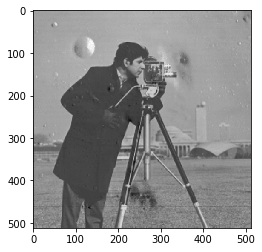

In [213]:
def sumaImgs(img1, img2):
    max_v = 0
    imgO = np.empty_like(img1, dtype=np.uint32)
    for i in range(img1.shape[0]) :
        for j in range(img1.shape[1]) :
            imgO[i, j] = int(img1[i, j]) + int(img2[i, j])
            if imgO[i, j] > max_v : max_v = imgO[i, j]
    return reajuste(imgO, 255, 0, max_v, 0)
plt.imshow(sumaImgs(camera, moon), cmap='gray')
plt.show()

 Resta $\overrightarrow{f} = \overrightarrow{g} - \overrightarrow{h}, f_n = g_n - h_n$

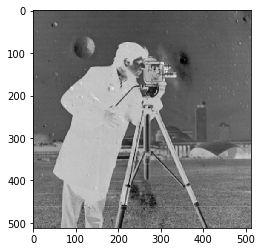

In [149]:
camera_moon = np.empty_like(moon, dtype=np.int16)
for i in range(moon.shape[0]) :
    for j in range(moon.shape[1]) :
        camera_moon[i, j] = int(moon[i, j]) - int(camera[i, j])
plt.imshow(camera_moon, cmap='gray')
plt.show()

Multipicación $\overrightarrow{f} = \overrightarrow{g} * \overrightarrow{h}, f_n = g_n * h_n$

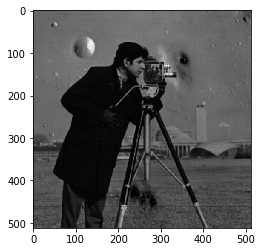

In [211]:
def multImgs(img1, img2):
    max_v = 0
    imgO = np.empty_like(img1, dtype=np.uint16)
    for i in range(img1.shape[0]) :
        for j in range(img1.shape[1]) :
            imgO[i, j] = int(img1[i, j]) * int(img2[i, j])
            if imgO[i, j] > max_v : max_v = imgO[i, j]
    return reajuste(imgO, 255, 0, max_v, 0)
plt.imshow(multImg(moon, camera), cmap='gray')
plt.show()

División $\overrightarrow{f} = \overrightarrow{g} / \overrightarrow{h} \qquad f_n = g_n / h_n \qquad h_n \ne 0  \quad \forall n \in L$

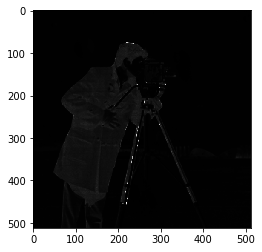

In [151]:
camera_moon = np.empty_like(moon, dtype=np.float)
for i in range(moon.shape[0]) :
    for j in range(moon.shape[1]) :
        if(camera[i, j] > 0):
            camera_moon[i, j] = float(moon[i, j]) / int(camera[i, j])
        else :
            camera_moon[i, j] = moon[i, j]
plt.imshow(camera_moon, cmap='gray')
plt.show()

### Escalar y Señal

Las opreaciones son muy similares a señal con señal

Suma $\overrightarrow{f} = \overrightarrow{g} + a \qquad f_n = g_n + a \qquad a \in \mathbb{R}$

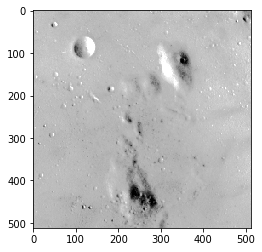

In [154]:
camera_moon = np.empty_like(moon)
a = 100
for i in range(moon.shape[0]) :
    for j in range(moon.shape[1]) :
        camera_moon[i, j] = 255 if int(moon[i, j]) + a > 255 else int(moon[i, j]) + a
plt.imshow(camera_moon, cmap='gray')
plt.show()

Resta $\overrightarrow{f} = \overrightarrow{g} - a \qquad f_n = g_n - a, a \in \mathbb{R}$

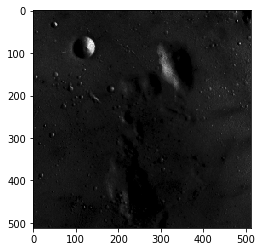

In [155]:
camera_moon = np.empty_like(moon)
a = 100
for i in range(moon.shape[0]) :
    for j in range(moon.shape[1]) :
        camera_moon[i, j] = 0 if int(moon[i, j]) - a < 0 else int(moon[i, j]) - a
plt.imshow(camera_moon, cmap='gray')
plt.show()

### Operaciones diferenciales

Diferencias finitas hacia atras

$\overrightarrow{f} = \Delta_a\overrightarrow{g} \qquad f_n = g_n - g_{n-1}$

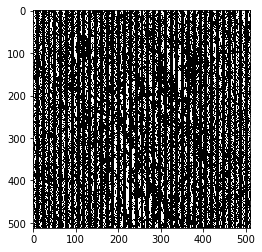

In [160]:
moon = io.imread(filename)
camera_moon = np.zeros_like(moon[:,:-1], dtype = np.uint16)
for i in range(camera_moon.shape[0]) :
    for j in range(camera_moon.shape[1]) :
        camera_moon[i, j] = int(moon[i, j+1]) - int(moon[i, j])

plt.imshow(camera_moon, cmap='gray')
plt.show()

Diferencias finitas hacia atras

$\overrightarrow{f} = \Delta_a\overrightarrow{g} \qquad f_n = g_n - g_{n+1}$

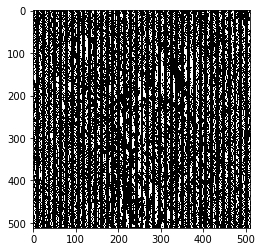

In [161]:
#Horizontal
moon = io.imread(filename)
camera_moon = np.zeros_like(moon[:,:-1], dtype = np.uint16)
a = 100
for i in range(camera_moon.shape[0]) :
    for j in range(camera_moon.shape[1]) :
        camera_moon[i, j] = int(moon[i, j]) - int(moon[i, j+1])

camera_moon2 = reajuste(camera_moon, 255, 0, max_v, min_v)
plt.imshow(camera_moon, cmap='gray')
plt.show()

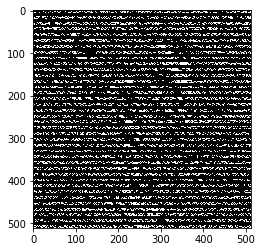

In [226]:
#Vertical
moon = io.imread(filename)
camera_moon = np.zeros_like(moon[:-1,:], dtype = np.uint16)
a = 100
for i in range(camera_moon.shape[0]) :
    for j in range(camera_moon.shape[1]) :
        camera_moon[i, j] = int(moon[i, j]) - int(moon[i+1, j])

camera_moon2 = reajuste(camera_moon, 255, 0, max_v, min_v)
plt.imshow(camera_moon, cmap='gray')
plt.show()

Diferencias finitas centrales hacia atras

$\overrightarrow{f} = \Delta_a\overrightarrow{g} \qquad f_n = \frac{g_{n+1} - g_{n-1}}{2}$

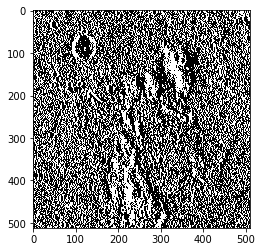

In [225]:
moon = io.imread(filename)
camera_moon = np.zeros_like(moon[:,:-2], dtype = np.uint16)
for i in range(1, camera_moon.shape[0]) :
    for j in range(0, camera_moon.shape[1]) :
        camera_moon[i, j] = (int(moon[i, j+1]) - int(moon[i, j-1]))
plt.imshow(camera_moon, cmap='gray')
plt.show()

Diferencias finitas centrales hacia adelante

$\overrightarrow{f} = \Delta_a\overrightarrow{g}, f_n = \frac{g_{n-1} - g_{n+1}}{2}$

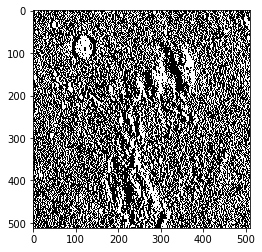

In [164]:
moon = io.imread(filename)
camera_moon = np.zeros_like(moon[:,:-2], dtype = np.uint16)
for i in range(1, camera_moon.shape[0]) :
    for j in range(0, camera_moon.shape[1]) :
        camera_moon[i, j] = (int(moon[i, j-1]) - int(moon[i, j+1]))
plt.imshow(camera_moon, cmap='gray')
plt.show()

Diferencias finitas en diagonal ($\nearrow$)

$\overrightarrow{f} = \Delta_a\overrightarrow{g} \qquad f_n = g_{n+1, m+1} - g_{n, m}$

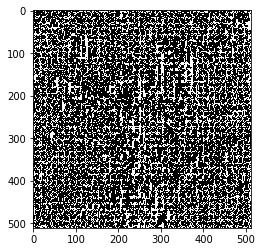

In [172]:
moon = io.imread(filename)
camera_moon = np.zeros_like(moon[:-1,:-1], dtype = np.uint16)
for i in range(camera_moon.shape[0]) :
    for j in range(camera_moon.shape[1]) :
        camera_moon[i, j] = (int(moon[i, j]) - int(moon[i+1, j+1]))
plt.imshow(camera_moon, cmap='gray')
plt.show()

Diferencias finitas en diagonal ($\swarrow$)

$\overrightarrow{f} = \Delta_a\overrightarrow{g} \qquad f_n = g_{n, m} - g_{n+1, m+1}$

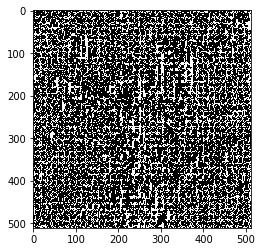

In [170]:
moon = io.imread(filename)
camera_moon = np.zeros_like(moon[:-1,:-1], dtype = np.uint16)
for i in range(camera_moon.shape[0]) :
    for j in range(camera_moon.shape[1]) :
        camera_moon[i, j] = (int(moon[i, j]) - int(moon[i+1, j+1]))
plt.imshow(camera_moon, cmap='gray')
plt.show()

## Iluminación y Contraste

$\overrightarrow{f} = a \overrightarrow{g} + b \qquad a,b \in \mathbb{R} \qquad \overrightarrow{g} \in \mathbb{R}^{mn}$

a - contraste de la imágen

b - iluminación de la imágen

El contraste e iluminación pueden variar, por lo que se puede representar como 

$\overrightarrow{f} = \overrightarrow{a} \overrightarrow{g} + \overrightarrow{b}$

Ejemplo:

$\overrightarrow{b}$ lo define una gaussiana centrada en $(m_0, n_0)$ con parámetro $\sigma$

$\overrightarrow{a}$ lo define una rampa con pendiente $(u_0, v_0)$

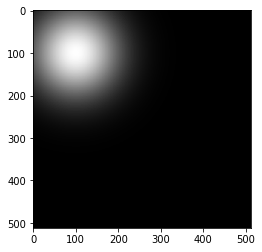

In [190]:
from scipy.stats import multivariate_normal
#center position
x, y = 100, 100
gauss = multivariate_normal((x,y), np.mat('5000,0; 0 5000'))
img_gauss = np.zeros((512,512), dtype=np.float)
min_v = 0
max_v = 0
for i in range(img_gauss.shape[0]) :
    for j in range(img_gauss.shape[1]) :
        img_gauss[i,j] = mult * gauss.pdf((i,j))
        if(img_gauss[i, j] < min_v): min_v = img_gauss[i, j]
        if(img_gauss[i, j] > max_v): max_v = img_gauss[i, j]

img_gauss2 = reajuste(img_gauss, 255, 0, max_v, min_v)
plt.imshow(img_gauss2, cmap='gray')
plt.show()

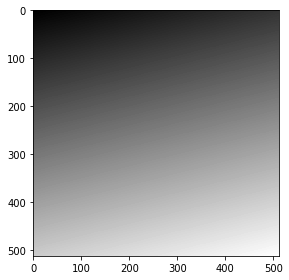

In [188]:
min_v = 0;
max_v = 0;
x, y = 0.2, 0.05
rampa = np.zeros_like(moon)
for i in range(rampa.shape[0]) :
    for j in range(rampa.shape[1]) :
        rampa[i,j] = i * x + j * y
        if(rampa[i, j] < min_v): min_v = rampa[i, j]
        if(rampa[i, j] > max_v): max_v = rampa[i, j]
rampa = reajuste(rampa, 255, 0, max_v, min_v)
io.imshow(rampa)
io.show()

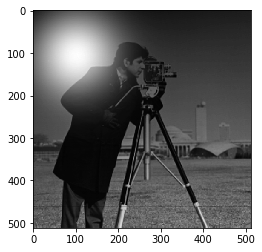

In [215]:
rampa_gauss = multImgs(camera, rampa)
rampa_gauss = sumaImgs(rampa_gauss, img_gauss2)
plt.imshow(rampa_gauss, cmap='gray')
plt.show()

## Composición

$\overrightarrow{g}$ y $\overrightarrow{h}$ son dos imágenes definidas en **L**

$\overrightarrow{f} = (1- \alpha)\overrightarrow{g} + \alpha \overrightarrow{h} \qquad \alpha \in [0, 1]$  

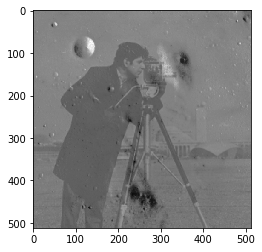

In [220]:
moon = io.imread(filename)
camera = data.camera()

alpha = 0.8
def sumaImgsAlpha(img1, img2, alp):
    max_v = 0
    imgO = np.empty_like(img1)
    for i in range(img1.shape[0]) :
        for j in range(img1.shape[1]) :
            imgO[i, j] = float(img1[i, j])*(1-alp) + float(img2[i, j])*alp
    return imgO
plt.imshow(sumaImgsAlpha(camera, moon, alpha), cmap='gray')
plt.show()


Composición con alpha variable

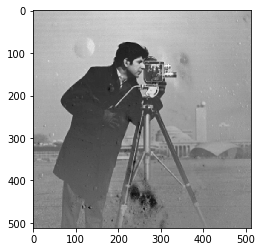

In [223]:
moon = io.imread(filename)
camera = data.camera()

alpha = 0.8
def sumaImgsAlpha(img1, img2, alp):
    max_v = 0
    imgO = np.empty_like(img1)
    for i in range(img1.shape[0]) :
        for j in range(img1.shape[1]) :
            imgO[i, j] = float(img1[i, j])*(1-rampa[i, j]/255.0) + float(img2[i, j])*(rampa[i, j]/255.0)
    return imgO
plt.imshow(sumaImgsAlpha(camera, moon, alpha), cmap='gray')
plt.show()